In [ ]:
import numpy as np
import pandas as pd
from   pandas import DataFrame
from   scipy.spatial import distance
import warnings
from   sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.preprocessing import RobustScaler,StandardScaler,LabelEncoder,LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading and checking the shape of the data
data = pd.read_csv('/content/drive/MyDrive/Data/fifa21.csv')
data.shape

(18541, 92)

In [ ]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Penalties,Composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,253283,Facundo Pellistri,18,https://cdn.sofifa.com/players/253/283/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,71,87,Peñarol,...,66.0,61.0,35.0,11.0,18.0,9.0,12.0,7.0,8.0,7.0
1,1,179813,Edinson Cavani,32,https://cdn.sofifa.com/players/179/813/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,86,86,Paris Saint-Germain,...,85.0,80.0,57.0,48.0,39.0,12.0,5.0,13.0,13.0,10.0
2,2,245541,Giovanni Reyna,17,https://cdn.sofifa.com/players/245/541/20_60.png,United States,https://cdn.sofifa.com/flags/us.png,68,87,Borussia Dortmund,...,50.0,59.0,30.0,23.0,24.0,10.0,13.0,14.0,12.0,7.0
3,3,233419,Raphael Dias Belloli,23,https://cdn.sofifa.com/players/233/419/20_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,81,85,Stade Rennais FC,...,73.0,79.0,45.0,54.0,38.0,8.0,7.0,13.0,8.0,14.0
4,4,198710,James Rodríguez,28,https://cdn.sofifa.com/players/198/710/20_60.png,Colombia,https://cdn.sofifa.com/flags/co.png,82,82,Everton,...,81.0,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0


In [ ]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'Weak Foot', 'Skill Moves',
       'International Reputation', 'Work Rate', 'Body Type', 'Real Face',
       'Release Clause', 'Position', 'Jersey Number', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'GK', 'Likes', 'Dislikes', 'Following', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power',
       'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 

In [ ]:
features = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'Weak Foot', 'Skill Moves','International Reputation', 'Work Rate', 'Body Type',
        'Position', 'Height', 'Weight', 'Likes', 'Dislikes', 'Following', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve','FK Accuracy', 'Long Passing',
        'Ball Control', 'Acceleration','Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power',
        'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression','Interceptions', 'Positioning',
        'Vision', 'Penalties', 'Composure', 'Standing Tackle', 'Sliding Tackle',
        'GK Diving','GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']

In [ ]:
# Incorporating those features in the dataframe
df = data[features]
df.shape

(18541, 54)

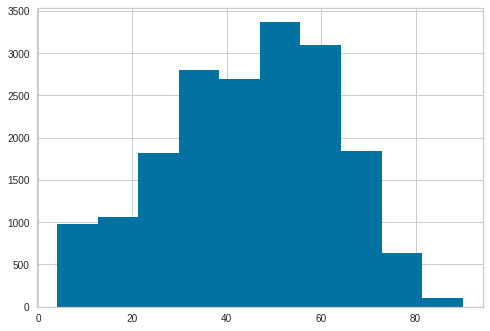

In [ ]:
df.Volleys.hist()

In [ ]:
print(df.skew())
df.describe()

<ipython-input-170-464a6684d828>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Age                  0.452131
Overall              0.007257
Potential            0.146412
Value                6.485183
Wage                 6.709928
Special             -0.690855
Likes               10.334823
Dislikes            31.252235
Following            7.929128
Crossing            -0.682686
Finishing           -0.416673
Heading Accuracy    -0.896844
Short Passing       -1.213095
Volleys             -0.235103
Dribbling           -1.251452
Curve               -0.340910
FK Accuracy          0.063328
Long Passing        -0.609307
Ball Control        -1.439766
Acceleration        -0.847736
Sprint Speed        -0.875085
Agility             -0.658629
Reactions           -0.152745
Balance             -0.619518
Shot Power          -0.418903
Jumping             -0.458104
Stamina             -0.871303
Strength            -0.445510
Long Shots          -0.525545
Aggression          -0.444913
Interceptions       -0.241559
Positioning         -0.844935
Vision              -0.383689
Penalties 

,Age,Overall,Potential,Value,Wage,Special,Likes,Dislikes,Following,Crossing,...,Vision,Penalties,Composure,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
count,18541.000000,18541.000000,18541.000000,1.854100e+04,18541.000000,18541.000000,18541.000000,18541.000000,18541.000000,18388.000000,...,18316.000000,18505.000000,17889.000000,18411.000000,18370.000000,18511.000000,18509.000000,18509.000000,18507.000000,18505.000000
mean,25.322636,66.723586,72.187153,2.420461e+06,10088.064290,1624.428618,10.879564,1.103446,67.581630,51.262508,...,55.119404,50.019292,59.603052,47.971430,45.847904,15.672087,15.566643,15.552596,15.565246,15.802864
std,4.954431,6.861342,5.786598,5.166395e+06,20474.923541,261.787379,38.096726,5.419817,225.916776,17.932116,...,13.739589,15.733036,11.807557,21.486975,21.175411,16.863310,16.177023,16.039980,16.401177,17.134275
min,16.000000,38.000000,46.000000,0.000000e+00,0.000000,731.000000,0.000000,0.000000,0.000000,6.000000,...,10.000000,7.000000,12.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,68.000000,3.500000e+05,1000.000000,1486.000000,0.000000,0.000000,1.000000,40.000000,...,46.000000,40.000000,52.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,67.000000,72.000000,7.500000e+05,3000.000000,1654.000000,1.000000,0.000000,7.000000,55.000000,...,57.000000,51.000000,60.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,71.000000,76.000000,2.200000e+06,10000.000000,1805.000000,6.000000,1.000000,34.000000,65.000000,...,65.000000,61.000000,68.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,53.000000,93.000000,95.000000,1.055000e+08,560000.000000,2316.000000,1106.000000,344.000000,5138.000000,94.000000,...,95.000000,94.000000,96.000000,93.000000,95.000000,90.000000,92.000000,93.000000,93.000000,90.000000


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                       8.0
Overall                   9.0
Potential                 8.0
Value               1850000.0
Wage                   9000.0
Special                 319.0
Likes                     6.0
Dislikes                  1.0
Following                33.0
Crossing                 25.0
Finishing                31.0
Heading Accuracy         20.0
Short Passing            14.0
Volleys                  26.0
Dribbling                17.0
Curve                    26.0
FK Accuracy              26.0
Long Passing             20.0
Ball Control             14.0
Acceleration             17.0
Sprint Speed             17.0
Agility                  18.0
Reactions                12.0
Balance                  17.0
Shot Power               20.0
Jumping                  15.0
Stamina                  17.0
Strength                 16.0
Long Shots               29.0
Aggression               25.0
Interceptions            38.5
Positioning              24.0
Vision                   19.0
Penalties 

In [ ]:
# Checking the column null values

df.isnull().sum()

Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        371
Value                         0
Wage                          0
Special                       0
Preferred Foot                0
Weak Foot                     0
Skill Moves                   0
International Reputation      0
Work Rate                     0
Body Type                    51
Position                     25
Height                        0
Weight                        0
Likes                         0
Dislikes                      0
Following                     0
Crossing                    153
Finishing                   209
Heading Accuracy            133
Short Passing               220
Volleys                     163
Dribbling                   183
Curve                       120
FK Accuracy                  44
Long Passing                138
Ball Control                214
Accelera

In [ ]:
df['Potential'].replace({np.NaN:data['Potential'].mean()},inplace=True)

df['Volleys'].replace({np.NaN:data['Volleys'].mean()},inplace=True)
df['Curve'].replace({np.NaN:data['Curve'].mean()},inplace=True)
df['Agility'].replace({np.NaN:data['Agility'].mean()},inplace=True)
df['Balance'].replace({np.NaN:data['Balance'].mean()},inplace=True)
df['Jumping'].replace({np.NaN:data['Jumping'].mean()},inplace=True)
df['Interceptions'].replace({np.NaN:data['Interceptions'].mean()},inplace=True)
df['Positioning'].replace({np.NaN:data['Positioning'].mean()},inplace=True)
df['Composure'].replace({np.NaN:data['Composure'].mean()},inplace=True)
df['Sliding Tackle'].replace({np.NaN:data['Sliding Tackle'].mean()},inplace=True)
df['Crossing'].replace({np.NaN:data['Crossing'].mean()},inplace=True)
df['Finishing'].replace({np.NaN:data['Finishing'].mean()},inplace=True)
df['Heading Accuracy'].replace({np.NaN:data['Heading Accuracy'].mean()},inplace=True)
df['Short Passing'].replace({np.NaN:data['Short Passing'].mean()},inplace=True)
df['Dribbling'].replace({np.NaN:data['Dribbling'].mean()},inplace=True)
df['FK Accuracy'].replace({np.NaN:data['FK Accuracy'].mean()},inplace=True)
df['Long Passing'].replace({np.NaN:data['Long Passing'].mean()},inplace=True)
df['Ball Control'].replace({np.NaN:data['Ball Control'].mean()},inplace=True)
df['Acceleration'].replace({np.NaN:data['Acceleration'].mean()},inplace=True)
df['Sprint Speed'].replace({np.NaN:data['Sprint Speed'].mean()},inplace=True)
df['Reactions'].replace({np.NaN:data['Reactions'].mean()},inplace=True)
df['Shot Power'].replace({np.NaN:data['Shot Power'].mean()},inplace=True)
df['Stamina'].replace({np.NaN:data['Stamina'].mean()},inplace=True)
df['Strength'].replace({np.NaN:data['Strength'].mean()},inplace=True)
df['Long Shots'].replace({np.NaN:data['Long Shots'].mean()},inplace=True)
df['Aggression'].replace({np.NaN:data['Aggression'].mean()},inplace=True)
df['Vision'].replace({np.NaN:data['Vision'].mean()},inplace=True)
df['Penalties'].replace({np.NaN:data['Penalties'].mean()},inplace=True)
df['Standing Tackle'].replace({np.NaN:data['Standing Tackle'].mean()},inplace=True)
df['GK Diving'].replace({np.NaN:data['GK Diving'].mean()},inplace=True)
df['GK Handling'].replace({np.NaN:data['GK Handling'].mean()},inplace=True)
df['GK Kicking'].replace({np.NaN:data['GK Kicking'].mean()},inplace=True)
df['GK Positioning'].replace({np.NaN:data['GK Positioning'].mean()},inplace=True)
df['GK Reflexes'].replace({np.NaN:data['GK Reflexes'].mean()},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
nat_cnt=df.groupby('Nationality').apply(lambda x:x['Name'].count()).reset_index(name='Counts')
nat_cnt.sort_values(by='Counts',ascending=False,inplace=True)
top_20_nat_cnt=nat_cnt[:20]
fig=px.bar(top_20_nat_cnt,x='Nationality',y='Counts',color='Counts',title='Nationwise Representation in the FIFA Game')
fig.show()

In [ ]:
age_cnt=df.groupby('Age').apply(lambda x:x['Name'].count()).reset_index(name='Counts')
fig=px.bar(age_cnt,x='Age',y='Counts',color='Counts',title='Agewise Player distribution in FIFA 21')
fig.show()

In [ ]:
cond_1=df['Overall']!=df['Potential']
cond_2=df['Age']<25
df_fil=df[cond_1 & cond_2]
potential_play=df_fil[['Name','Age','Nationality','Club','Potential','Position','Overall','Value']]
potential_play.sort_values(by='Potential',ascending=False,inplace=True)
top_potential_play=potential_play[:50]
fig=px.scatter(potential_play,x='Age',y='Potential',size='Potential',color='Age',hover_data=['Name','Age','Nationality','Position','Overall','Value'],title='Age vs Maximum Potential Distribution of the young Players')
fig.show()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

final_team=df_fil[['Name','Age','Potential','Position','Club']]
final_team.sort_values(by='Age',inplace=True)
Position_play=final_team.groupby('Position').apply(lambda x:np.max(x['Potential'])).reset_index(name='Potential')
player_pos=pd.merge(final_team,Position_play,how='inner',left_on=['Position','Potential'],right_on=['Position','Potential'])
Position_best=player_pos[['Name','Club','Age','Position','Potential']]
cm = sns.light_palette("cyan", as_cmap=True)
Position_best.style.background_gradient(cmap=cm).set_precision(2)

<ipython-input-177-1724665265fa>:7: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Name,Club,Age,Position,Potential
0,Florian Wirtz,Bayer 04 Leverkusen,17,RCM,88
1,Isak Jansson,Kalmar FF,18,RF,73
2,Nuno Alexandre Tavares Mendes,Sporting CP,18,LWB,87
3,Reinier Jesus Carvalho,Borussia Dortmund,18,CF,87
4,Oliver Skipp,Norwich City,19,RDM,84
5,Jeremie Frimpong,Celtic,19,RWB,86
6,Thiago Almada,Vélez Sarsfield,19,LCM,89
7,Houssem Aouar,Olympique Lyonnais,22,LCM,89
8,Alphonso Davies,FC Bayern München,19,LB,89
9,Sergio Reguilón Rodríguez,Tottenham Hotspur,23,LB,89


In [ ]:
india_team_all_players=df[df['Nationality']=='England']
india_team_2=india_team_all_players[['Name','Age','Potential','Position']]
india_team_2.sort_values(by='Potential',inplace= False)
age_play=india_team_2.groupby('Position').apply(lambda x:np.max(x['Potential'])).reset_index(name='Potential')
player_pos=pd.merge(india_team_2,age_play,how='inner',left_on=['Position','Potential'],right_on=['Position','Potential'])
Position_best=player_pos[['Name','Age','Position','Potential']]
cm = sns.light_palette("cyan", as_cmap=True)
Position_best.style.background_gradient(cmap=cm).set_precision(2)

<ipython-input-178-0d4db6af765a>:8: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Name,Age,Position,Potential
0,Jude Bellingham,17,LCM,88
1,Mason Greenwood,18,RM,89
2,Jadon Sancho,20,RW,93
3,Brandon Williams,19,LB,85
4,Ben Chilwell,23,LB,85
5,Marcus Rashford,22,LM,91
6,Aaron Wan-Bissaka,22,RB,88
7,Declan Rice,21,CDM,86
8,Phil Foden,20,CAM,88
9,Joe Gomez,23,RCB,88


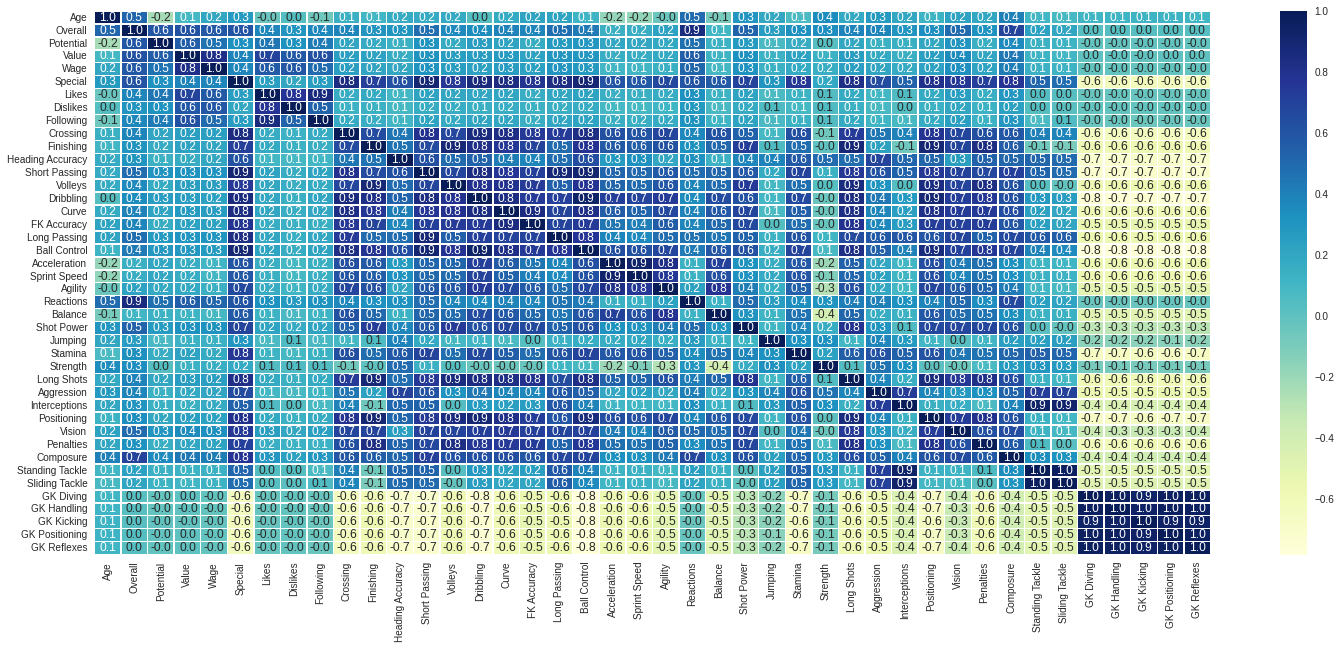

In [ ]:
corr_ = df.corr()

f,ax = plt.subplots(figsize=(25, 10))
sns.heatmap(corr_,annot=True, linewidths=0.5, cmap="YlGnBu", fmt= '.1f',ax=ax)
plt.show()

# Experiment 1

In [ ]:
df_new = df[(df['Value'] > 0)]

In [ ]:
df_new['Potential_new'] = df_new['Potential']

<ipython-input-222-b58662e7c937>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Adding the new transformed position field as Y df and dropped position field and made that as x df
x = df_new.drop(['Potential','Potential_new'], axis = 1)
y = df_new['Potential']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (18033, 53)
Shape of y : (18033,)


In [ ]:
x.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Club', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'Weak Foot', 'Skill Moves',
       'International Reputation', 'Work Rate', 'Body Type', 'Position',
       'Height', 'Weight', 'Likes', 'Dislikes', 'Following', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Standing Tackle', 'Sliding Tackle', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'],
      dtype='object')

In [ ]:
#Label Encoding to convert the features to model understandable format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit_transform(y)
print(y)
len(y)

0        87
1        86
2        87
3        85
4        82
         ..
18535    75
18536    77
18537    68
18539    76
18540    67
Name: Potential, Length: 18033, dtype: int64


18033

In [ ]:
# Label Encoding for final dataframe
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(0,x.shape[1]):
    if x.dtypes[i]=='object':
        x[x.columns[i]] = le.fit_transform(x[x.columns[i]])

print(x)
print(y)

        Name  Age  Nationality  Overall  Club       Value      Wage  Special  \
0       5283   18          162       71   598   4900000.0     500.0     1729   
1       4574   32          162       86   588  35500000.0  150000.0     2144   
2       6299   17          161       68   116   1800000.0    2000.0     1671   
3      14368   23           21       81   755  23000000.0   50000.0     2071   
4       7594   28           34       82   280  22500000.0  105000.0     2099   
...      ...  ...          ...      ...   ...         ...       ...      ...   
18535  14662   39           21       75   767    375000.0   10000.0     1730   
18536  15187   37           57       77   754    600000.0   15000.0     1086   
18537  15851   34           49       68   548    425000.0    6000.0     1744   
18539  16275   32           23       76    75   2200000.0   20000.0     1920   
18540  16303   35          149       67   389    110000.0    6000.0     1413   

       Preferred Foot  Weak Foot  ...  

In [ ]:
# using the train test split validation approach
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

print("Shape of X_train :", X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (12623, 49)
Shape of X_test : (5410, 49)
Shape of y_train : (12623,)
Shape of y_test : (5410,)


In [ ]:
print('Classes and number of values in trainset',Counter(y_train))

Classes and number of values in trainset Counter({72: 956, 73: 914, 71: 861, 75: 831, 70: 824, 74: 820, 69: 766, 68: 681, 67: 598, 76: 577, 77: 524, 66: 522, 78: 494, 65: 465, 64: 406, 79: 398, 80: 323, 81: 246, 63: 218, 82: 200, 83: 177, 62: 146, 84: 118, 61: 103, 85: 88, 86: 64, 60: 57, 87: 51, 59: 39, 88: 29, 58: 26, 89: 20, 90: 13, 56: 12, 57: 10, 55: 8, 91: 7, 52: 6, 54: 5, 53: 4, 50: 3, 93: 3, 48: 2, 51: 2, 46: 2, 95: 1, 47: 1, 49: 1, 92: 1})


In [ ]:
# Standard Scaling technique applied to the train and test dataframe
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
mdl = GaussianNB()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
print('Training Accuracy: %1.3f.' % mdl.score(X_train, y_train))
#10-fold cross validation score
cv = cross_val_score(estimator = mdl, X = X_train, y = y_train, cv =2)
SVC_cv = 10
print("10 fold cross validation :", SVC_cv)
from sklearn.metrics import accuracy_score
mdl_ac = accuracy_score(y_pred,y_test)
print("accuracy :", mdl_ac)
from sklearn.metrics import precision_score
mdl_p = precision_score(y_pred,y_test,average='weighted')
print("precision :", mdl_p)
from sklearn.metrics import recall_score
mdl_r = recall_score(y_pred,y_test,average='weighted')
print("recall :", mdl_r)
from sklearn.metrics import f1_score
mdl_f1 = f1_score(y_test, y_pred,average='weighted')
print("F1 Score :", mdl_f1)

Training Accuracy: 0.097.


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=2.



10 fold cross validation : 10
accuracy : 0.08576709796672828
precision : 0.20249535112345488
recall : 0.08576709796672828
F1 Score : 0.07809628873882386


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



# Experiment 2

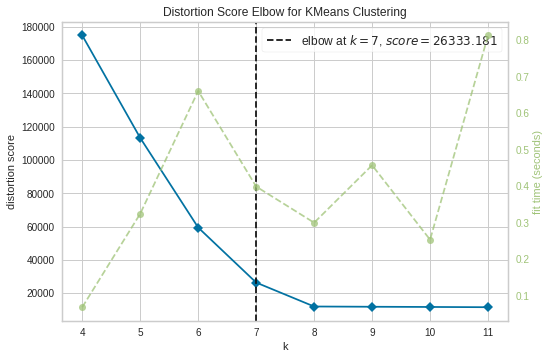

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
model = GaussianNB()
# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
df_new = df[(df['Value'] > 0)]

In [ ]:
df_new['Potential_new'] = pd.cut(x=df_new['Potential'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         labels=['bucket 1', 'bucket 2', 'bucket 3', 'bucket 4','bucket 5','bucket 6','bucket 7','bucket 8','bucket 9','bucket 10'])

<ipython-input-237-900bf31d0e22>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Adding the new transformed position field as Y df and dropped position field and made that as x df
x = df_new.drop(['Potential','Potential_new','Standing Tackle', 'GK Kicking','GK Positioning','GK Handling'], axis = 1)
y = df_new['Potential_new']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (18033, 49)
Shape of y : (18033,)


In [ ]:
x.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Club', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'Weak Foot', 'Skill Moves',
       'International Reputation', 'Work Rate', 'Body Type', 'Position',
       'Height', 'Weight', 'Likes', 'Dislikes', 'Following', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Sliding Tackle', 'GK Diving', 'GK Reflexes'],
      dtype='object')

In [ ]:
#Label Encoding to convert the features to model understandable format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit_transform(y)
print(y)
len(y)

0        bucket 9
1        bucket 9
2        bucket 9
3        bucket 9
4        bucket 9
           ...   
18535    bucket 8
18536    bucket 8
18537    bucket 7
18539    bucket 8
18540    bucket 7
Name: Potential_new, Length: 18033, dtype: category
Categories (10, object): ['bucket 1' < 'bucket 2' < 'bucket 3' < 'bucket 4' ... 'bucket 7' <
                          'bucket 8' < 'bucket 9' < 'bucket 10']


18033

In [ ]:
# Label Encoding for final dataframe
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(0,x.shape[1]):
    if x.dtypes[i]=='object':
        x[x.columns[i]] = le.fit_transform(x[x.columns[i]])

print(x)


        Name  Age  Nationality  Overall  Club       Value      Wage  Special  \
0       5283   18          162       71   598   4900000.0     500.0     1729   
1       4574   32          162       86   588  35500000.0  150000.0     2144   
2       6299   17          161       68   116   1800000.0    2000.0     1671   
3      14368   23           21       81   755  23000000.0   50000.0     2071   
4       7594   28           34       82   280  22500000.0  105000.0     2099   
...      ...  ...          ...      ...   ...         ...       ...      ...   
18535  14662   39           21       75   767    375000.0   10000.0     1730   
18536  15187   37           57       77   754    600000.0   15000.0     1086   
18537  15851   34           49       68   548    425000.0    6000.0     1744   
18539  16275   32           23       76    75   2200000.0   20000.0     1920   
18540  16303   35          149       67   389    110000.0    6000.0     1413   

       Preferred Foot  Weak Foot  ...  

In [ ]:
# using the train test split validation approach
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

print("Shape of X_train :", X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (12623, 49)
Shape of X_test : (5410, 49)
Shape of y_train : (12623,)
Shape of y_test : (5410,)


In [ ]:
print('Classes and number of values in trainset',Counter(y_train))

Classes and number of values in trainset Counter({'bucket 8': 6698, 'bucket 7': 4729, 'bucket 9': 1006, 'bucket 6': 169, 'bucket 10': 12, 'bucket 5': 9})


In [ ]:
# Standard Scaling technique applied to the train and test dataframe
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
mdl = GaussianNB()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
print('Training Accuracy: %1.3f.' % mdl.score(X_train, y_train))
#10-fold cross validation score
cv = cross_val_score(estimator = mdl, X = X_train, y = y_train, cv =7)
SVC_cv = 7
print("10 fold cross validation :", SVC_cv)
from sklearn.metrics import accuracy_score
mdl_ac = accuracy_score(y_pred,y_test)
print("accuracy :", mdl_ac)
from sklearn.metrics import precision_score
mdl_p = precision_score(y_pred,y_test,average='weighted')
print("precision :", mdl_p)
from sklearn.metrics import recall_score
mdl_r = recall_score(y_pred,y_test,average='weighted')
print("recall :", mdl_r)
from sklearn.metrics import f1_score
mdl_f1 = f1_score(y_test, y_pred,average='weighted')
print("F1 Score :", mdl_f1)

Training Accuracy: 0.533.
10 fold cross validation : 7
accuracy : 0.5306839186691312
precision : 0.5962500760960857
recall : 0.5306839186691312
F1 Score : 0.5459434429903387


# Experiment 3


In [ ]:
df_new = df[(df['Value'] > 0)]

In [ ]:
x = df_new.drop(['Potential','Standing Tackle', 'GK Kicking','GK Positioning','GK Handling'], axis = 1)
y = df_new['Potential']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (18033, 49)
Shape of y : (18033,)


In [ ]:
x.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Club', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'Weak Foot', 'Skill Moves',
       'International Reputation', 'Work Rate', 'Body Type', 'Position',
       'Height', 'Weight', 'Likes', 'Dislikes', 'Following', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Sliding Tackle', 'GK Diving', 'GK Reflexes'],
      dtype='object')

In [ ]:
#Label Encoding to convert the features to model understandable format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit_transform(y)
print(y)
len(y)

0        87
1        86
2        87
3        85
4        82
         ..
18535    75
18536    77
18537    68
18539    76
18540    67
Name: Potential, Length: 18033, dtype: int64


18033

In [ ]:
# Label Encoding for final dataframe
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(0,x.shape[1]):
    if x.dtypes[i]=='object':
        x[x.columns[i]] = le.fit_transform(x[x.columns[i]])

print(x)
print(y)

        Name  Age  Nationality  Overall  Club       Value      Wage  Special  \
0       5283   18          162       71   598   4900000.0     500.0     1729   
1       4574   32          162       86   588  35500000.0  150000.0     2144   
2       6299   17          161       68   116   1800000.0    2000.0     1671   
3      14368   23           21       81   755  23000000.0   50000.0     2071   
4       7594   28           34       82   280  22500000.0  105000.0     2099   
...      ...  ...          ...      ...   ...         ...       ...      ...   
18535  14662   39           21       75   767    375000.0   10000.0     1730   
18536  15187   37           57       77   754    600000.0   15000.0     1086   
18537  15851   34           49       68   548    425000.0    6000.0     1744   
18539  16275   32           23       76    75   2200000.0   20000.0     1920   
18540  16303   35          149       67   389    110000.0    6000.0     1413   

       Preferred Foot  Weak Foot  ...  

In [ ]:
# using the train test split validation approach
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

print("Shape of X_train :", X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (12623, 49)
Shape of X_test : (5410, 49)
Shape of y_train : (12623,)
Shape of y_test : (5410,)


In [ ]:
print('Classes and number of values in trainset',Counter(y_train))

Classes and number of values in trainset Counter({72: 956, 73: 914, 71: 861, 75: 831, 70: 824, 74: 820, 69: 766, 68: 681, 67: 598, 76: 577, 77: 524, 66: 522, 78: 494, 65: 465, 64: 406, 79: 398, 80: 323, 81: 246, 63: 218, 82: 200, 83: 177, 62: 146, 84: 118, 61: 103, 85: 88, 86: 64, 60: 57, 87: 51, 59: 39, 88: 29, 58: 26, 89: 20, 90: 13, 56: 12, 57: 10, 55: 8, 91: 7, 52: 6, 54: 5, 53: 4, 50: 3, 93: 3, 48: 2, 51: 2, 46: 2, 95: 1, 47: 1, 49: 1, 92: 1})


In [ ]:
# Standard Scaling technique applied to the train and test dataframe
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
mdl = LinearRegression()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
print('Training Accuracy: %1.3f.' % mdl.score(X_train, y_train))
#10-fold cross validation score
cv = cross_val_score(estimator = mdl, X = X_train, y = y_train, cv =8)
SVC_cv = 8
print("k fold cross validation :", SVC_cv)


Training Accuracy: 0.809.
k fold cross validation : 8
